# preprocessing

In [63]:
!rm -rf TabularDS  # Remove the existing directory
!git clone https://github.com/ItamarBerger/TabularDS


Cloning into 'TabularDS'...
remote: Enumerating objects: 376, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 376 (delta 104), reused 34 (delta 4), pack-reused 161 (from 1)
Receiving objects: 100% (376/376), 23.14 MiB | 25.05 MiB/s, done.
Resolving deltas: 100% (164/164), done.
Updating files: 100% (16/16), done.


In [64]:
# load dataset
import pandas as pd
data = pd.read_csv('/content/TabularDS/final_project/code/data/rating.csv')
# data = retails.copy()

In [24]:
# retails.head()
# print(len(retails))
df = data
data.head()

,userId,movieId,rating,timestamp
0,122270,8360,3.5,2012-04-22 01:07:04
1,49018,32,2.0,2001-09-11 07:50:36
2,89527,109374,3.5,2015-01-06 09:26:40
3,106704,1060,3.0,2000-01-22 21:27:57
4,47791,1732,2.0,2006-01-19 15:48:23


In [66]:
movie_popularity = data.groupby('movieId')['userId'].nunique().sort_values(ascending=False)



print(len(movie_popularity))
# Select the top 10% most popular movies
top_10_percent_count = int(0.1 * len(movie_popularity))
top_movies = movie_popularity.head(top_10_percent_count).index.tolist()

# Filter dataset to only include these movies
filtered_df = data[data['movieId'].isin(top_movies)]


user_movie_matrix = filtered_df.pivot_table(index='userId', columns='movieId', values='rating', aggfunc='count').fillna(0)
user_movie_matrix = user_movie_matrix.map(lambda x: 1 if x > 0 else 0)  # Convert to binary


print(user_movie_matrix.shape)



6730
(22524, 673)


Number of ones in the user_movie_matrix: 111408


In [67]:
from sklearn.cluster import KMeans

num_clusters = 40
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
user_clusters = kmeans.fit_predict(user_movie_matrix)

# Add cluster labels to the user-movie matrix
user_movie_matrix['Cluster'] = user_clusters

print(user_movie_matrix.head())


movieId  1  2  3  5  6  7  10  11  16  17  ...  63082  68157  68358  68954  \
userId                                     ...                               
7        0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   
11       0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   
14       0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   
18       0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   
20       0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   

movieId  69122  70286  72998  79132  80463  Cluster  
userId                                               
7            0      0      0      0      0       29  
11           0      0      0      0      0       29  
14           0      0      0      0      0       14  
18           0      0      0      0      0       29  
20           0      0      0      0      0       29  

[5 rows x 674 columns]


In [68]:
transactions = movie_popularity


In [69]:
print(user_movie_matrix.head())
df =  user_movie_matrix




movieId  1  2  3  5  6  7  10  11  16  17  ...  63082  68157  68358  68954  \
userId                                     ...                               
7        0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   
11       0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   
14       0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   
18       0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   
20       0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   

movieId  69122  70286  72998  79132  80463  Cluster  
userId                                               
7            0      0      0      0      0       29  
11           0      0      0      0      0       29  
14           0      0      0      0      0       14  
18           0      0      0      0      0       29  
20           0      0      0      0      0       29  

[5 rows x 674 columns]


#Apriori for rule mining

In [ ]:
# data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# data.dropna(subset=['InvoiceNo', 'Description'], inplace=True)

# transactions = data.groupby('CustomerID')['Description'].apply(list).tolist()
# print(f"number of transactions is: {len(transactions)}")

number of transactions is: 4372


In [ ]:
!pip install efficient-apriori

In [70]:
import pandas as pd
# from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample a smaller subset
transactions = user_movie_matrix.drop(columns=['Cluster'])

# Optimize TransactionEncoder using sparse format
# te = TransactionEncoder()
# te_ary = te.fit(transactions).transform(transactions, sparse=True)
# df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)

# Apply Apriori with a higher support threshold (adjust as needed)
# frequent_itemsets, rules = apriori(df, min_support=0.05, min_confidence = 0.5)
from mlxtend.frequent_patterns import fpgrowth, association_rules
frequent_itemsets = fpgrowth(transactions, min_support=0.00005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Generate association rules
# if not frequent_itemsets.empty:
#     rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    antecedents consequents  antecedent support  consequent support   support  \
0         (208)      (2628)            0.003197            0.003063  0.000089   
1        (2628)       (208)            0.003063            0.003197  0.000089   
2         (356)       (110)            0.006837            0.005550  0.000089   
3         (110)       (356)            0.005550            0.006837  0.000089   
4        (1193)      (2916)            0.003063            0.003285  0.000089   
..          ...         ...                 ...                 ...       ...   
247       (204)       (593)            0.000977            0.006393  0.000089   
248       (480)      (2455)            0.006837            0.001199  0.000089   
249      (2455)       (480)            0.001199            0.006837  0.000089   
250       (420)       (780)            0.001021            0.005061  0.000089   
251       (780)       (420)            0.005061            0.001021  0.000089   

     confidence       lift 

In [71]:
import numpy as np

# Calculate the average support, confidence, and lift from the rules DataFrame
avg_support = np.mean(rules['support'])
avg_confidence = np.mean(rules['confidence'])
avg_lift = np.mean(rules['lift'])

# Print the metrics
print(f"\nMetrics: Support average: {avg_support:.4f}, Confidence average: {avg_confidence:.4f}, Lift average: {avg_lift:.4f}")

# Store the rules and itemsets for later use
original_rules = rules
original_itemsets = frequent_itemsets



Metrics: Support average: 0.0001, Confidence average: 0.0400, Lift average: 18.2813


In [ ]:
# top rules by lift
# top_lift_rules = rules.sort_values('lift', ascending=False).head(100)
# print(top_lift_rules)


In [ ]:
# import matplotlib.pyplot as plt
# import networkx as nx
# from mlxtend.frequent_patterns import apriori, association_rules

# # Create a directed graph
# G = nx.DiGraph()
# narrow_rules = rules[0:25]
# # Add nodes and directed edges
# for _, rule in narrow_rules.iterrows():
#     antecedent = ', '.join(list(rule['antecedents']))
#     consequent = ', '.join(list(rule['consequents']))

#     # Add a directed edge from antecedent to consequent
#     G.add_edge(antecedent, consequent, weight=rule['lift'], support=rule['support'], confidence=rule['confidence'])

# # Draw the directed graph
# plt.figure(figsize=(12, 12))
# pos = nx.spring_layout(G, k=0.3, iterations=20)  # Layout for the graph

# # Draw the nodes and edges
# nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue', alpha=0.7)
# nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5, arrowstyle='->', arrowsize=10)
# nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# # Add edge labels (optional, if you want to display lift, confidence, or support)
# # edge_labels = nx.get_edge_attributes(G, 'weight')
# # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# plt.title("Association Rules Directed Graph")
# plt.axis('off')
# plt.show()



In [ ]:
# import plotly.graph_objects as go
# import networkx as nx
# from mlxtend.frequent_patterns import apriori, association_rules

# # Example association rules (you need to load your own rules here)
# # Example: rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# # Create a directed graph
# G = nx.DiGraph()

# # Add nodes and directed edges
# for _, rule in narrow_rules.iterrows():
#     antecedent = ', '.join(list(rule['antecedents']))
#     consequent = ', '.join(list(rule['consequents']))

#     # Add a directed edge from antecedent to consequent
#     G.add_edge(antecedent, consequent, weight=rule['lift'], support=rule['support'], confidence=rule['confidence'])

# # Get positions of nodes using a layout
# pos = nx.spring_layout(G, k=0.3, iterations=20)

# # Get edge and node information for Plotly
# edge_x = []
# edge_y = []
# for edge in G.edges():
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]
#     edge_x.append(x0)
#     edge_y.append(y0)
#     edge_x.append(x1)
#     edge_y.append(y1)

# # Node positions
# node_x = [pos[node][0] for node in G.nodes()]
# node_y = [pos[node][1] for node in G.nodes()]

# # Create hover text for nodes (empty text for default)
# hover_text = [node for node in G.nodes()]

# # Create the plotly figure
# fig = go.Figure()

# # Add directed edges with arrows (using annotations for arrows)
# for edge in G.edges():
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]

#     # Add edge line
#     fig.add_trace(go.Scatter(x=[x0, x1], y=[y0, y1],
#                              line=dict(width=1, color='gray'),
#                              mode='lines',
#                              showlegend=False))

#     # Add arrow (using annotations)
#     fig.add_annotation(
#         x=x1, y=y1,
#         ax=x0, ay=y0,
#         axref="x", ayref="y", xref="x", yref="y",
#         showarrow=True, arrowhead=2, arrowsize=1,
#         arrowcolor='gray', opacity=0.7
#     )

# # Add nodes to the plot
# fig.add_trace(go.Scatter(x=node_x, y=node_y,
#                          mode='markers',
#                          hoverinfo='text',  # This ensures text shows on hover only
#                          hovertext=hover_text,  # Set hovertext to show item names on hover
#                          marker=dict(color='skyblue', size=10, line=dict(width=1, color='black'))))

# # Add edge labels (optional: you can use lift or other metrics)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# for edge, label in edge_labels.items():
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]
#     fig.add_trace(go.Scatter(x=[(x0+x1)/2], y=[(y0+y1)/2],
#                              text=[f'Lift: {label:.2f}'],
#                              mode='text',
#                              showlegend=False))

# # Update layout settings for better visualization
# fig.update_layout(title="Association Rules Directed Graph (Interactive)",
#                   showlegend=False,
#                   hovermode='closest',
#                   xaxis=dict(showgrid=False, zeroline=False),
#                   yaxis=dict(showgrid=False, zeroline=False))

# # Show the plot
# fig.show()


In [ ]:
# import seaborn as sns

# # Plot support vs confidence
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='support', y='confidence', data=rules, hue='lift', palette='coolwarm', size='lift', sizes=(50, 300))
# plt.title("Support vs Confidence with Lift")
# plt.xlabel('Support')
# plt.ylabel('Confidence')
# plt.show()

# # Plot lift distribution
# plt.figure(figsize=(10, 6))
# sns.histplot(rules['lift'], kde=True)
# plt.title("Lift Distribution")
# plt.xlabel('Lift')
# plt.ylabel('Frequency')
# plt.show()


# Cluster items + Apriori


In [ ]:
import pandas as pd
import numpy as np
# from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#  Convert Transactions to One-Hot Encoded Format
te = TransactionEncoder()
one_hot = te.fit_transform(transactions)
df = pd.DataFrame(one_hot, columns=te.columns_)

#  Find Optimal Number of Clusters (Elbow Method)
# distortions = []
# K_range = range(2, 10)  # Try different values of K

# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     kmeans.fit(df)
#     distortions.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# #  Plot the Elbow Curve
# plt.figure(figsize=(8, 5))
# plt.plot(K_range, distortions, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Distortion')
# plt.title('Elbow Method for Optimal k')
# plt.show()




In [ ]:
#  Perform K-Means with Optimal k
optimal_k = 4  # Choose based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

#  Print Cluster Assignments
print(df[['Cluster']])
# for i in range(optimal_k):
# # Print Cluster Assignments
# print(df[['Cluster']])

# Iterate over clusters and print the sum of values for each cluster


      Cluster
0           3
1           2
2           3
3           2
4           3
...       ...
4367        3
4368        3
4369        3
4370        0
4371        3

[4372 rows x 1 columns]


In [ ]:
print(df['Cluster'].value_counts().sort_index())


Cluster
0     160
1       5
2     962
3    3245
Name: count, dtype: int64


In [74]:

# Function to process a single cluster
def process_cluster(cluster_id, df):
    print(f"\nProcessing Cluster {cluster_id}...")

    # Extract transactions for the cluster
    cluster_data = df[df['Cluster'] == cluster_id].drop(columns=['Cluster'])


    # Run Apriori
    from mlxtend.frequent_patterns import fpgrowth, association_rules
    # from scipy.sparse import csr_matrix
    # cluster_data_sparse = csr_matrix(cluster_data)
    # df_cluster_data = pd.DataFrame.sparse.from_spmatrix(cluster_data_sparse, columns=cluster_data.columns)

    scale_k = 0.00005 * np.sqrt(len(transactions))
    min_support =  scale_k / np.sqrt(len(cluster_data)) if len(cluster_data) > 0 else 0
    print(f"min_support: {min_support}")


    frequent_itemsets = fpgrowth(cluster_data, min_support=min_support, use_colnames=True)
    if frequent_itemsets.empty:
        print(f"No frequent itemsets found in Cluster {cluster_id}.")
        return None
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

    print(f"Cluster {cluster_id}: {len(rules)} rules generated.")

    return cluster_id, {"frequent_itemsets": frequent_itemsets, "rules": rules}

# Process clusters sequentially (without parallel computation)
cluster_results = {}
# Loop through all unique cluster IDs
for cluster_id in sorted(df['Cluster'].unique()):
    if df['Cluster'].value_counts()[cluster_id] < 30:
        cluster_results[cluster_id] = cluster_id, {"frequent_itemsets": None, "rules": None}
        continue
    cluster_results[cluster_id] = process_cluster(cluster_id, df)



Processing Cluster 0...
min_support: 0.0007288528075642843
Cluster 0: 318 rules generated.

Processing Cluster 1...
min_support: 0.0006364808824065848


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_n

Cluster 1: 222 rules generated.

Processing Cluster 2...
min_support: 0.0006086546856106421
Cluster 2: 212 rules generated.

Processing Cluster 3...
min_support: 0.0009530088176148283
Cluster 3: 134 rules generated.

Processing Cluster 5...
min_support: 0.0006711780687716189


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Cluster 5: 326 rules generated.

Processing Cluster 6...
min_support: 0.0001102456883810192


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Cluster 6: 9096 rules generated.

Processing Cluster 7...
min_support: 0.0005755304458650707
Cluster 7: 202 rules generated.

Processing Cluster 8...
min_support: 0.0009607886105165698
Cluster 8: 66 rules generated.

Processing Cluster 9...
min_support: 0.0007823459703937283
Cluster 9: 186 rules generated.

Processing Cluster 10...
min_support: 0.0008723221572022265
Cluster 10: 138 rules generated.

Processing Cluster 11...
min_support: 0.0009769374492059443
Cluster 11: 76 rules generated.

Processing Cluster 12...
min_support: 0.0005969861012312524
Cluster 12: 312 rules generated.

Processing Cluster 13...
min_support: 0.0008139229621010174
Cluster 13: 110 rules generated.

Processing Cluster 14...
min_support: 0.0008496605657102587
Cluster 14: 230 rules generated.

Processing Cluster 15...
min_support: 0.000705916839344973


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be dis

Cluster 15: 50 rules generated.

Processing Cluster 16...
min_support: 0.0006658722300649379
Cluster 16: 90 rules generated.

Processing Cluster 17...
min_support: 0.00090999353585293
Cluster 17: 48 rules generated.

Processing Cluster 18...
min_support: 0.000641109895267745
Cluster 18: 450 rules generated.

Processing Cluster 19...
min_support: 0.0006967288098555697


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool 

Cluster 19: 230 rules generated.

Processing Cluster 20...
min_support: 0.0008496605657102587
Cluster 20: 256 rules generated.

Processing Cluster 21...
min_support: 0.0006297216018008656
Cluster 21: 124 rules generated.

Processing Cluster 22...
min_support: 0.000587758558167711
Cluster 22: 130 rules generated.

Processing Cluster 23...
min_support: 0.001050770025771017
Cluster 23: 78 rules generated.

Processing Cluster 24...
min_support: 0.0009167593802050949
Cluster 24: 52 rules generated.

Processing Cluster 25...
min_support: 0.0009607886105165698
Cluster 25: 164 rules generated.

Processing Cluster 26...
min_support: 0.0008442658409094746
Cluster 26: 166 rules generated.

Processing Cluster 27...
min_support: 0.0010118390098321876
Cluster 27: 54 rules generated.

Processing Cluster 28...
min_support: 0.0007658736841020196
Cluster 28: 162 rules generated.

Processing Cluster 29...
min_support: 6.246395856599167e-05
Cluster 29: 11246 rules generated.

Processing Cluster 30...
min_

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_n

Cluster 38: 884 rules generated.

Processing Cluster 39...
min_support: 0.0008139229621010174
Cluster 39: 70 rules generated.


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


    Avg Support  Avg Confidence     Avg Lift
0      0.009493        0.780112    59.377358
1      0.007259        0.731707    64.405405
2      0.006641        0.721077    67.198113
3      0.016129        0.794415    36.507463
5      0.008049        0.764101    66.387870
6      0.000218        0.569270  1572.086034
7      0.005999        0.698293    68.764898
8      0.016393        0.642325    17.363636
9      0.010870        0.776648    50.903226
10     0.013709        0.677830    26.304348
11     0.016949        0.663693    19.315789
12     0.006451        0.808970    97.615385
13     0.011765        0.721497    37.654545
14     0.012821        0.854069    55.234783
15     0.009912        0.504956     1.000000
16     0.007874        0.702362    51.400000
17     0.015319        0.599571    13.500000
18     0.007299        0.829231    90.209349
19     0.008996        0.743441    56.434783
20     0.012821        0.841897    53.335938
21     0.007156        0.623523    35.064516
22     0.0

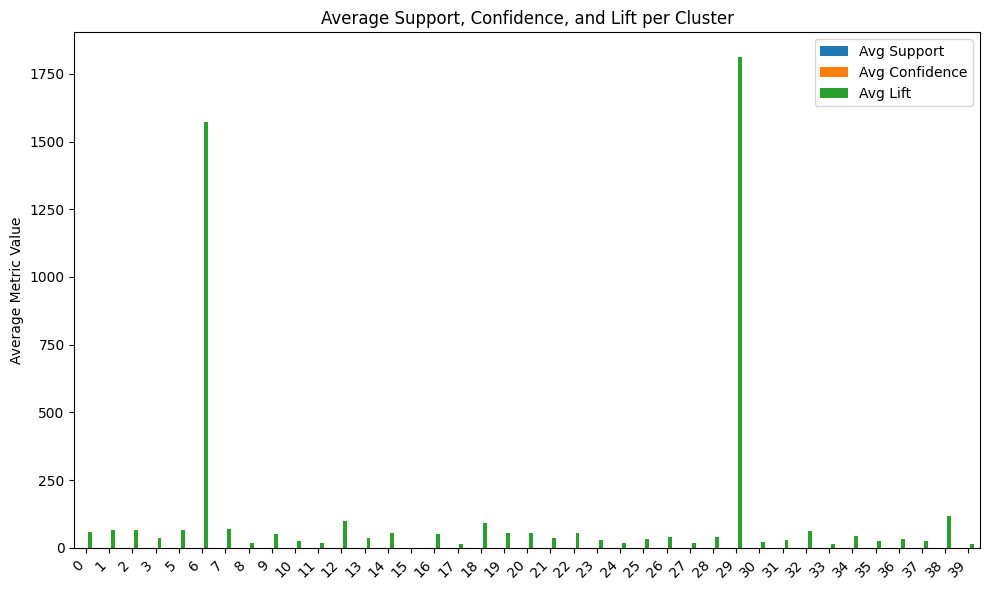

In [77]:
import matplotlib.pyplot as plt

# Initialize dictionary to store average metrics per cluster
cluster_metrics = {}

for cluster_id, data in cluster_results.items():
    # Access the dictionary that is the second element of the tuple
    rules = data[1]["rules"]

    if rules is not None and not rules.empty:
        avg_support = rules["support"].mean()
        avg_confidence = rules["confidence"].mean()
        avg_lift = rules["lift"].mean()
    else:
        avg_support, avg_confidence, avg_lift = 0, 0, 0  # Handle empty clusters

    cluster_metrics[cluster_id] = {
        "Avg Support": avg_support,
        "Avg Confidence": avg_confidence,
        "Avg Lift": avg_lift
    }

# Convert dictionary to DataFrame for easier plotting
metrics_df = pd.DataFrame.from_dict(cluster_metrics, orient="index")
print(metrics_df)

# Plotting the metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric for every cluster
metrics_df.plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_ylabel('Average Metric Value')
ax.set_title('Average Support, Confidence, and Lift per Cluster')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


# Using item-based CF for rules mining

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform

transactions = transactions


def calculate_jaccard_similarity(transaction_matrix):
    """Calculate Jaccard similarity between all item pairs"""
    binary_matrix = (transaction_matrix > 0).astype(int)
    jaccard_dist = pdist(binary_matrix.T, metric='jaccard')
    jaccard_sim = 1 - squareform(jaccard_dist)
    return pd.DataFrame(jaccard_sim, index=transaction_matrix.columns, columns=transaction_matrix.columns)

def calculate_item_means(transaction_matrix):
    """Calculate mean occurrence (probability) for each item"""
    return transaction_matrix.mean()

def calculate_recommendation_score(transaction_items, candidate_item, item_similarity_df, transaction_matrix):
    """
    Calculate recommendation score using adjusted formula for binary ratings:
    score(u,i) = Σj similarity(i,j)(r(u,j) - r̄j) / Σj |similarity(i,j)| + r̄i
    where:
    - r(u,j) is 1 if item j is in transaction, 0 otherwise
    - r̄j is the mean occurrence of item j across all transactions
    - r̄i is the mean occurrence of candidate item i
    """
    # Get mean occurrences for all items
    item_means = calculate_item_means(transaction_matrix)

    numerator = 0
    denominator = 0

    # Calculate the weighted sum of deviations from mean
    for item in transaction_items:
        similarity = item_similarity_df.loc[candidate_item, item]
        # r(u,j) is 1 since item is in transaction
        rating_deviation = 1 - item_means[item]  # (r(u,j) - r̄j)
        numerator += similarity * rating_deviation
        denominator += abs(similarity)

    # Add the candidate item's mean occurrence
    mean_i = item_means[candidate_item]

    if denominator != 0:
        score = (numerator / denominator) + mean_i
    else:
        score = mean_i

    return score

def generate_transaction_rules(transactions):
    # Create binary transaction matrix
    item_list = sorted(set([item for sublist in transactions for item in sublist]))
    transaction_matrix = pd.DataFrame(0, index=range(len(transactions)), columns=item_list)
    for idx, transaction in enumerate(transactions):
        for item in transaction:
            transaction_matrix.at[idx, item] = 1

    # Calculate item similarity
    item_similarity_df = calculate_jaccard_similarity(transaction_matrix)

    # Generate recommendations
    recommendations = []

    for transaction in transactions:
        scores = {}

        # Calculate scores for all possible items not in transaction
        for candidate_item in item_list:
            if candidate_item not in transaction:
                score = calculate_recommendation_score(
                    transaction,
                    candidate_item,
                    item_similarity_df,
                    transaction_matrix
                )
                scores[candidate_item] = score

        if scores:
            # Get best recommendation
            best_item = max(scores.items(), key=lambda x: x[1])

            recommendation = {
                'transaction': transaction,
                'recommended_item': best_item[0],
                'score': best_item[1]
            }
            recommendations.append(recommendation)

    return pd.DataFrame(recommendations)


# Usage
rules_df = generate_transaction_rules(transactions)



In [ ]:
rules_df.head()

In [ ]:
# Function to calculate support, confidence, lift, and more
def calculate_metrics(rule, all_transactions):
    antecedent = set(rule['transaction'])
    consequent = set([rule['recommended_item']])

    # Calculate support
    support_antecedent = sum(1 for transaction in all_transactions if antecedent.issubset(set(transaction))) / len(all_transactions)
    support_consequent = sum(1 for transaction in all_transactions if consequent.issubset(set(transaction))) / len(all_transactions)
    support_rule = sum(1 for transaction in all_transactions if antecedent.issubset(set(transaction)) and consequent.issubset(set(transaction))) / len(all_transactions)

    # Calculate confidence
    confidence = support_rule / support_antecedent if support_antecedent != 0 else 0

    # Calculate lift
    lift = confidence / support_consequent if support_consequent != 0 else 0

    # Calculate leverage
    expected_support = support_antecedent * support_consequent
    leverage = support_rule - expected_support

    # Calculate conviction
    conviction = (1 - support_consequent) / (1 - confidence) if confidence < 1 else np.inf

    return {
        'support_antecedent': support_antecedent,
        'support_consequent': support_consequent,
        'support_rule': support_rule,
        'confidence': confidence,
        'lift': lift,
        'leverage': leverage,
        'conviction': conviction
    }

# Calculate metrics for each rule
metrics = []
for _, rule in rules_df.iterrows():
    rule_metrics = calculate_metrics(rule, transactions)
    metrics.append(rule_metrics)

# Add metrics to the DataFrame
metrics_df = pd.DataFrame(metrics)

# Combine the original rules with the calculated metrics
df_rules = pd.concat([rules_df, metrics_df], axis=1)

print(df_rules)

In [ ]:
# Sort the rules by average rating and select the top 100
top_100_rules = df_rules.sort_values(by='conviction', ascending=False).head(100)

# Display the top 100 rules
print(top_100_rules[['lift', 'conviction']])

In [ ]:
print(top_100_rules[['antecedents', 'consequents', 'lift', 'rating', 'confidence', 'support']])


In [ ]:
# perform item-based CF for rule mining
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def compute_item_ratings(invoice_items, item_sim_df):
    """
    Calculate predicted rating for items not in the invoice.
    Rating(Item X) = sum(sim(Item X, item_in_invoice)) / sum(similarities)
    """
    scores = {}
    norm_factor = 0

    for item in invoice_items:
        similar_items = item_sim_df[item].drop(index=invoice_items, errors="ignore")  # Remove existing items
        for sim_item, similarity in similar_items.items():
            scores[sim_item] = scores.get(sim_item, 0) + similarity  # Aggregate similarity scores
            norm_factor += similarity  # Normalize by sum of similarities

    if norm_factor == 0:
        return {}

    # Normalize scores
    for item in scores:
        scores[item] /= norm_factor

    return scores

In [ ]:
from tqdm.notebook import tqdm
threshold = 0.2  # Min rating for an item to be considered

rules = []
for invoice in tqdm(df_onehot.index,desc="Processing Raiting"):
    existing_items = df_onehot.columns[df_onehot.loc[invoice] == 1].tolist()
    predicted_ratings = compute_item_ratings(existing_items, item_sim_df)

    # Select items with rating above threshold
    recommended_items = {item for item, score in predicted_ratings.items() if score > threshold}

    if recommended_items:
        rules.append((set(existing_items), recommended_items))  # Format: {A, B, C} → {D, F}

rules_df = pd.DataFrame(rules, columns=["Antecedent", "Consequent"])


In [ ]:
# compute Confidence and Lift
def compute_rule_metrics(rules_df, df_onehot):
    total_invoices = len(df_onehot)
    metrics = []

    for _, row in rules_df.iterrows():
        antecedent = row["Antecedent"]
        consequent = row["Consequent"]

        support_A = (df_onehot[list(antecedent)].sum(axis=1) == len(antecedent)).mean()
        support_B = (df_onehot[list(consequent)].sum(axis=1) == len(consequent)).mean()
        support_A_B = ((df_onehot[list(antecedent)].sum(axis=1) == len(antecedent)) &
                       (df_onehot[list(consequent)].sum(axis=1) == len(consequent))).mean()

        confidence = support_A_B / support_A if support_A > 0 else 0
        lift = confidence / support_B if support_B > 0 else 0
        interestingness = confidence * lift  # Tradeoff metric

        metrics.append((antecedent, consequent, confidence, lift, interestingness))

    return pd.DataFrame(metrics, columns=["Antecedent", "Consequent", "Confidence", "Lift", "Interestingness"])

rules_eval_df = compute_rule_metrics(rules_df, df_onehot)




In [ ]:
# Select Top 100 Most Interesting Rules
top_100_rules = rules_eval_df.sort_values(by="Interestingness", ascending=False).head(100)
print(top_100_rules)